#**Assignment 4**

In [136]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt

#Discrete Fourier Transform
\begin{equation}X(k) =\displaystyle\sum_{n=0}^{N-1}x[n]*e^{−j(2π/N)kn}\end{equation}


In [166]:
def dft(x):
  N=len(x)
  y=np.zeros(N,dtype=complex)
  for k in range(N):
    for n in range(N):
      y[k]+=x[n]*np.exp(-1j*(2*np.pi*k*n)/N)
  return y

#Inverse Discrete Fourier Transform
\begin{equation}x[n] =\frac{1}N\displaystyle\sum_{k=0}^{N-1}X(k)*e^{j(2π/N)kn}\end{equation}

In [167]:
def idft(x,N):
  y=np.zeros(N,dtype=complex)
  for k in range(N):
    for n in range(len(x)):
      y[k]+=(1/N)*x[n]*np.exp(1j*(2*np.pi*k*n)/N)
  return y

#Circular Convolution
\begin{equation}y[n] =\sum_{k=0}^{N-1}g[k]h[<n-k>_N]\end{equation}

In [139]:
def circ_conv(g,h):
  N=max(len(g),len(h))
  y=np.zeros(N)
  for k in range(len(g)):
    for n in range(len(h)):
      if k-n>=0:
        y[k]+=g[n]*h[k-n]
      if k-n<0:
        y[k]+=g[n]*h[N+k-n]
  return y

###Circular convolution of **x[n] = [1,2,3,0,0,0,0]** and **h[n] = [1,1,1,1,1,1,1]**

Circular Convolution of x[n] and h[n] is [6. 6. 6. 6. 6. 6. 6.]


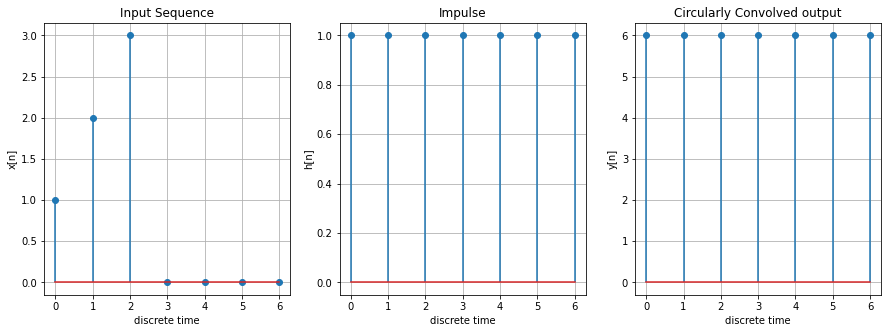

In [140]:
x = [1,2,3,0,0,0,0]
h = [1,1,1,1,1,1,1]
y=circ_conv(x,h)
print("Circular Convolution of x[n] and h[n] is",y)

plt.figure(1,figsize=(15,5))
plt.subplot(1,3,1)
plt.stem(x,use_line_collection=True)
plt.title("Input Sequence")
plt.xlabel("discrete time")
plt.ylabel("x[n]")
plt.grid(True)

plt.subplot(1,3,2)
plt.stem(h,use_line_collection=True)
plt.title("Impulse")
plt.xlabel("discrete time")
plt.ylabel("h[n]")
plt.grid(True)

plt.subplot(1,3,3)
plt.stem(y,use_line_collection=True)
plt.title("Circularly Convolved output")
plt.xlabel("discrete time")
plt.ylabel("y[n]")
plt.grid(True)

Magnitude at 35 Hz 3.338937852553705


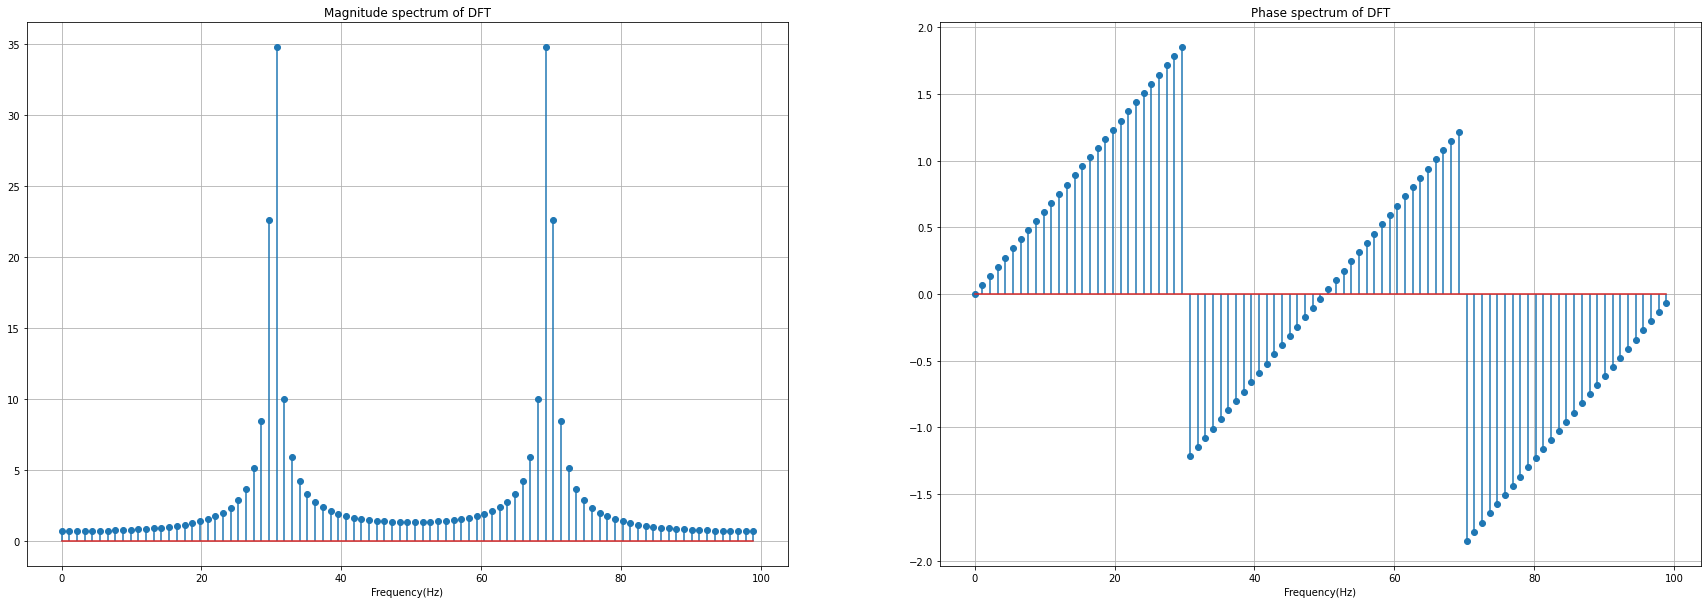

In [141]:
f=30 #frequency of cosine signal
t = np.linspace(0,0.91,91)
x=np.cos(2*np.pi*f*t) #given signal
n = np.arange(91)
X = dft(x)
fseq= (n*100)/91


plt.figure(1,figsize=(30, 10))
plt.subplot(1,2,1)
plt.stem(fseq,abs(X),use_line_collection=True)
plt.title("Magnitude spectrum of DFT")
plt.xlabel("Frequency(Hz)")
plt.grid()

plt.subplot(1,2,2)
plt.stem(fseq,np.angle(X),use_line_collection=True)
plt.title("Phase spectrum of DFT")
plt.xlabel("Frequency(Hz)")
plt.grid()

m= X[np.where(np.round(fseq)==35)]
print("Magnitude at 35 Hz",abs(m)[0])

Inspite of using a 30Hz sinusoidal function we are getting a non-zero magnitude<br>of fourier transform because it is an approximated version of the actual<br> fourier transform,i.e.,DTFT

In [142]:
x = [1,-3,1,5]
y = [7,-7,-9,-3]
X=dft(x)
Y=dft(y)
H=np.zeros(len(x),dtype=complex)

for i in range(len(x)):
  H[i]=Y[i]/X[i]
h=idft(H,len(x))
print(np.abs(h))

[1.63312394e+15 1.63312394e+15 1.63312394e+15 1.63312394e+15]


\begin{equation}x[n]  = (3/4)^nu[n]\end{equation}
\begin{equation} 0 ≤ n ≤ 50\end{equation}

In [143]:
#Unit step function definition
def unit_step(n):
  return 1*(n>=0)

n=np.arange(0,50)
u=pow(3/4,n)*unit_step(n)

E=np.sum(np.square(u))
print("Energy of x[n] is ",E)



Energy of x[n] is  2.285714285713553


In [144]:
U=np.zeros(len(n),dtype=complex)
U=dft(u)# dft of u

e=np.sum(np.square(abs(U)))
print("Energy of DFT of x[n] is ",e)
print("Energy (X(k))/50 is ",e/50)

Energy of DFT of x[n] is  114.28571428567757
Energy (X(k))/50 is  2.2857142857135515


The Energy of x[n] is equal to the energy of fourier transform of x[n] divided by number of samples which follows from Parseval's Theorem:
\begin{equation}\displaystyle\sum_{n=0}^{N-1}|x[n]|^2=\frac{1}{N}\displaystyle\sum_{n=0}^{N-1}|X[k]|^2\end{equation}

##Modified DFT function for DTFS Coefficients

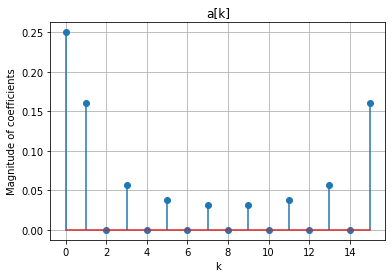

In [145]:
def mod_dft(x,p):
  y=np.zeros(p,dtype=complex)
  for k in range(p):
    for n in range(p):
      y[k]+=x[n]*np.exp(-1j*(2*np.pi*k*n)/p)
  return y

x=np.zeros(32,dtype=complex)

for i in range(32):
  if i%16<8:
    x[i]=1

a=(mod_dft(x,16))/len(x)
plt.xlabel("k")
plt.ylabel("Magnitude of coefficients")
plt.title('a[k]')
plt.stem(abs(a),use_line_collection=True)
plt.grid(True)

#Discrete Cosine Transform
\begin{equation}X(m) =\sqrt{\frac{2}{N}}\displaystyle\sum_{n=0}^{N-1}x[n]c_{m}cos{[\frac{πm}{2N}(2n+1)]}\end{equation}

In [163]:
x= [8, 16, 24, 32, 40, 48, 56, 64]

def dct(x,N):
  c=np.ones(N)
  c[0]=np.sqrt(1/2)
  y=np.zeros(N)
  for m in range(N):
    for n in range(N):
      y[m]+=np.sqrt(2/N)*x[n]*c[m]*np.cos(np.pi*m*(2*n+1)/(2*N))
  return y

y=dct(x,len(x))
y_=y[:4]

In [157]:
print("Energy of x[n] is ",np.sum(np.square(x)))
print("Energy of compressed DCT of x[n] is ",abs(np.sum(np.square(y_))))

Energy of x[n] is  13056
Energy of compressed DCT of x[n] is  13053.252307055182


#Inverse Discrete Cosine Transform
\begin{equation}x[n] =\sqrt{\frac{2}{N}}\displaystyle\sum_{m=0}^{N-1}X(m)c_{m}cos{[\frac{πm}{2N}(2n+1)]}\end{equation}

In [148]:
def idct(x,N):
  c=np.ones(N)
  c[0]=np.sqrt(1/2)
  y=np.zeros(N)
  for n in range(N):
    for m in range(len(x)):
      y[n]+=np.sqrt(2/N)*x[m]*c[m]*np.cos(np.pi*m*(2*n+1)/(2*N))
  return y

##Reconstruction of signal from its DCT(first four coefficients)

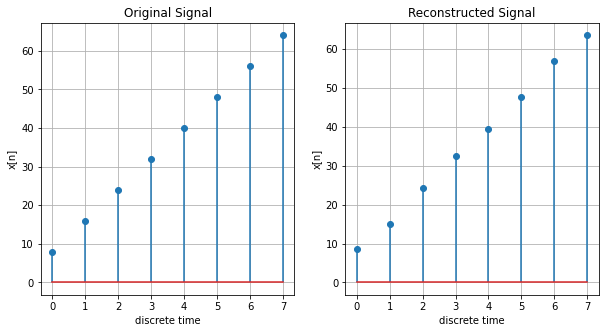

In [149]:
X=idct(y_,len(x)) #inverse dct

plt.figure(1,figsize=(10,5))
plt.subplot(1,2,1)
plt.stem(x,use_line_collection=True)
plt.title("Original Signal")
plt.xlabel("discrete time")
plt.ylabel("x[n]")
plt.grid(True)

plt.subplot(1,2,2)
plt.stem(X,use_line_collection=True)
plt.title("Reconstructed Signal")
plt.xlabel("discrete time")
plt.ylabel("x[n]")
plt.grid(True)

In [150]:
mse=(np.sum((X-x)**2))/len(x)
print("Mean squre error of reconstructed signal from first four coefficients of DCT w.r.t. original signal is ",mse)

Mean squre error of reconstructed signal from first four coefficients of DCT w.r.t. original signal is  0.34346161810222964


##Reconstruction of signal from its DFT(first four coefficients)

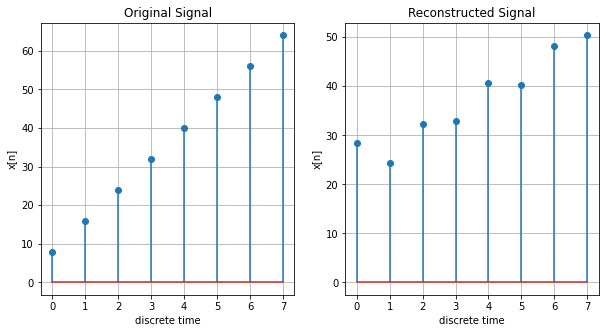

In [168]:
y=dft(x)
y_=y[:4]
X=idft(y_,len(x))

plt.figure(1,figsize=(10,5))
plt.subplot(1,2,1)
plt.stem(np.abs(x),use_line_collection=True)
plt.title("Original Signal")
plt.xlabel("discrete time")
plt.ylabel("x[n]")
plt.grid(True)

plt.subplot(1,2,2)
plt.stem(np.abs(X),use_line_collection=True)
plt.title("Reconstructed Signal")
plt.xlabel("discrete time")
plt.ylabel("x[n]")
plt.grid(True)


In [152]:
mse=(np.sum((X-x)**2))/len(x)
print("Mean squre error of reconstructed signal from first four coefficients of DFT w.r.t. original signal is ",abs(mse))

Mean squre error of reconstructed signal from first four coefficients of DFT w.r.t. original signal is  15.999999999999961


#Observation:
* Energy of signal is almost equal to the energy corresponding to the first four coefficients of DCT.
* The Mean square error calculated using the reconstructed x[n] from first four coefficients of DCT is less than the corresponding mean square calculated from DFT
* The reconstructed signal from DCT of x[n] resembles the original signal.
* The reconstructed signal from DFT of x[n] does not resemble the original signal

#Conclusion:
* Since,only first four coefficients are sufficient to reconstruct the signal in case of DCT the information of signal is stored in low frequency components of signal.
* Hence,DCT has application in image compression as it achieves energy compaction using lesser bits to store the information